In [1]:
!pip3 install torchvision
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms,models

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu') 

In [3]:
!git clone https://github.com/jaddoescad/ants_and_bees.git


fatal: destination path 'ants_and_bees' already exists and is not an empty directory.


In [4]:
transform_train = transforms.Compose([transforms.Resize((224,224)),
                               transforms.RandomHorizontalFlip(),
                               transforms.RandomRotation(10),
                               transforms.RandomAffine(0, shear = 10 , scale=(0.8,1.2)),
                               transforms.ColorJitter(brightness = 1, contrast = 0.2, saturation = 0.2),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                              ])


transform = transforms.Compose([transforms.Resize((224,224)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                              ])
training_datasets = datasets.ImageFolder('ants_and_bees/train', transform = transform_train)
validation_datasets = datasets.ImageFolder('ants_and_bees/val', transform = transform)

train_loader = torch.utils.data.DataLoader(dataset=training_datasets,batch_size = 20,shuffle = True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_datasets,batch_size = 20,shuffle = False)

In [5]:
training_datasets,validation_datasets

(Dataset ImageFolder
     Number of datapoints: 244
     Root location: ants_and_bees/train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
                RandomHorizontalFlip(p=0.5)
                RandomRotation(degrees=(-10, 10), resample=False, expand=False)
                RandomAffine(degrees=(0, 0), scale=(0.8, 1.2), shear=(-10, 10))
                ColorJitter(brightness=[0.0, 2.0], contrast=[0.8, 1.2], saturation=[0.8, 1.2], hue=None)
                ToTensor()
                Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
            ), Dataset ImageFolder
     Number of datapoints: 153
     Root location: ants_and_bees/val
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
                ToTensor()
                Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
            ))

In [6]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1,2,0)
  print(image.shape)
  image = image * np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5)) 
  image = image.clip(0,1)
  return image

In [7]:
classes = ['ant','bee']

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


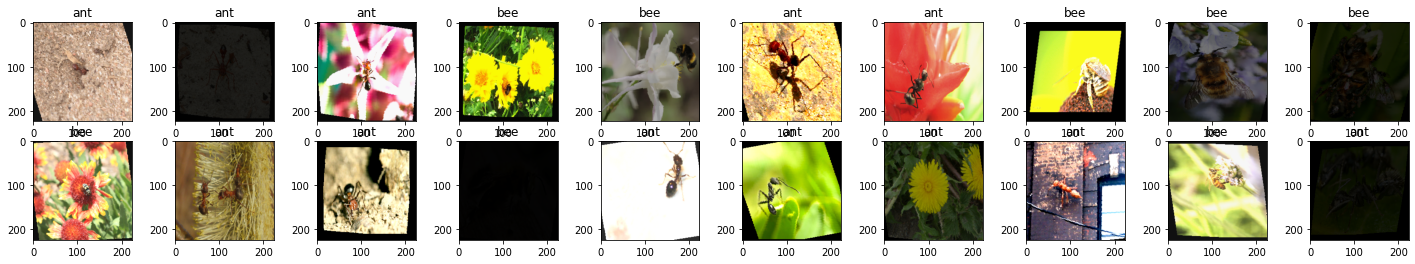

In [8]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25,4))

for i in np.arange(20):
  ax = fig.add_subplot(2,10,i+1)
  plt.imshow(im_convert(images[i]))
  ax.set_title(classes[labels[i].item()])

In [9]:
model = models.vgg16(pretrained = True)

In [10]:
model.parameters

<bound method Module.parameters of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size

In [11]:
for param in model.features.parameters():
  param.requires_grad = False

In [12]:
from torch import nn

In [13]:
n_inputs = model.classifier[6].in_features
last_layer = nn.Linear(n_inputs,len(classes))
model.classifier[6] = last_layer

In [14]:
model.parameters

<bound method Module.parameters of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size

In [15]:
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.0001)

In [17]:
epochs = 4
running_loss_history = []
running_correct_history = []
validation_running_loss_history = []
validation_running_correct_history = []
for i in range(epochs):
  running_loss = 0.0
  running_correct = 0.0
  validation_running_loss = 0.0
  validation_running_correct = 0.0
  for inputs, labels in train_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    
    outputs = model.forward(inputs)
    loss = criterion(outputs,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    _,pred = torch.max(outputs,1)
    running_correct += torch.sum(pred == labels.data)
  else:
    with torch.no_grad():
      for val_inputs,val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model.forward(val_inputs)
        val_loss = criterion(val_outputs,val_labels)
        validation_running_loss += val_loss.item()
        _,val_pred = torch.max(val_outputs,1)
        validation_running_correct += torch.sum(val_pred == val_labels.data)

    epoch_loss = running_loss/len(train_loader.dataset)
    epoch_accuracy = running_correct.float()/len(train_loader.dataset)
    running_loss_history.append(epoch_loss)
    running_correct_history.append(epoch_accuracy)

    val_epoch_loss = validation_running_loss/len(validation_loader.dataset)
    val_epoch_accuracy = validation_running_correct.float()/len(validation_loader.dataset)
    validation_running_loss_history.append(val_epoch_loss)
    validation_running_correct_history.append(val_epoch_accuracy)

    print('epoch is {}'.format(i))
    print('training_loss {:.4f}, training_accuracy {:.4f}'.format(epoch_loss, epoch_accuracy.item()))
    print('val_training_loss {:.4f}, val_training_accuracy {:.4f}'.format(val_epoch_loss, val_epoch_accuracy.item())) 

epoch is 0
training_loss 0.0249, training_accuracy 0.7295
val_training_loss 0.0159, val_training_accuracy 0.8758
epoch is 1
training_loss 0.0107, training_accuracy 0.9057
val_training_loss 0.0141, val_training_accuracy 0.9150
epoch is 2
training_loss 0.0111, training_accuracy 0.9057
val_training_loss 0.0133, val_training_accuracy 0.9281
epoch is 3
training_loss 0.0095, training_accuracy 0.9057
val_training_loss 0.0133, val_training_accuracy 0.9281


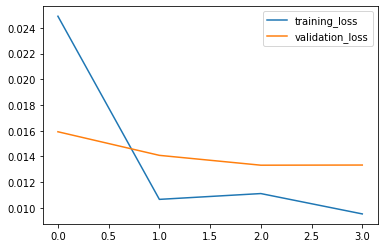

In [18]:
plt.plot(running_loss_history,label = 'training_loss')
plt.plot(validation_running_loss_history,label = 'validation_loss')
plt.legend()

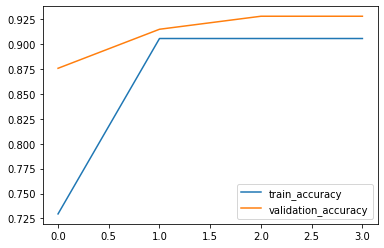

In [19]:
plt.plot(running_correct_history, label = 'train_accuracy')
plt.plot(validation_running_correct_history, label = 'validation_accuracy')
plt.legend()

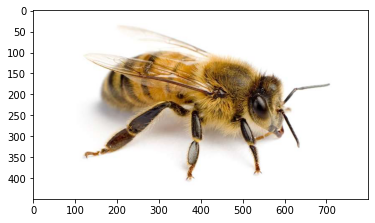

In [20]:
import requests
from PIL import Image
url = "https://cdn.britannica.com/s:800x450,c:crop/78/192578-138-DC7C6A32/conservation-efforts-bee-populations-plant-animal-species.jpg"
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

(224, 224, 3)


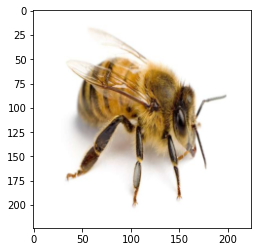

In [21]:
import PIL.ImageOps
from PIL import ImageMath

img = transform(img)
plt.imshow(im_convert(img))

In [22]:
img = img.to(device).unsqueeze(0)

output = model.forward(img)
_,pred = torch.max(output,1)
print(classes[pred.item()])

bee


(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


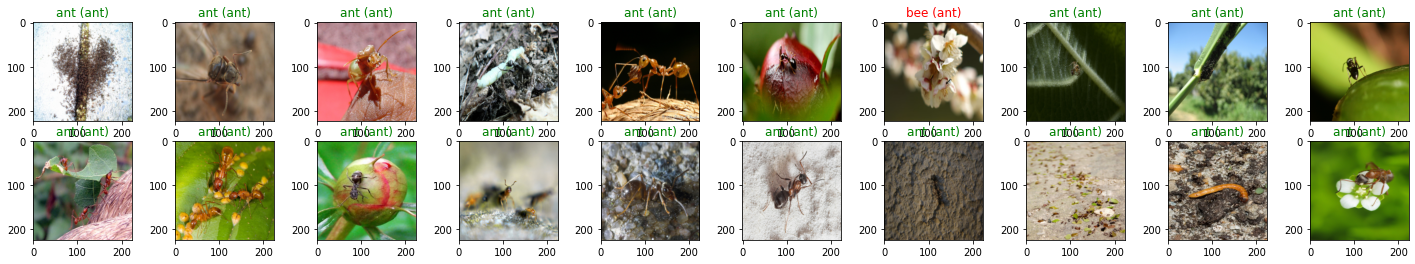

In [23]:
dataiter = iter(validation_loader)
images,labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)
outputs = model.forward(images)
_,pred = torch.max(outputs,1)

fig = plt.figure(figsize=(25,4))

for i in np.arange(20):
  ax = fig.add_subplot(2,10,i+1)
  plt.imshow(im_convert(images[i]))
  ax.set_title("{} ({})".format(str(classes[pred[i].item()]), str(classes[labels[i].item()])), color =('green' if pred[i]==labels[i] else 'red'))